<a href="https://colab.research.google.com/github/Rafagars/Dogs-and-Cats-CNN-API/blob/main/CNN_DOGS_N_CATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de perros y gatos con CNN

Este proyecto de Machine Learning se enfoca en la creación de un modelo de clasificación de imágenes capaz de distinguir entre perros y gatos con alta precisión. Para lograrlo, se implementó una Red Neuronal Convolucional (CNN) desde cero, utilizando el dataset "Dogs vs. Cats" de Kaggle.

El proceso incluyó el preprocesamiento de datos, donde las imágenes fueron redimensionadas y normalizadas. Se utilizó una arquitectura de CNN con capas convolucionales y de pooling para extraer características relevantes, seguida de capas densas para la clasificación final.

El notebook documenta cada paso, desde la preparación de los datos hasta la evaluación del rendimiento con métricas clave como la matriz de confusión, proporcionando una visión completa del flujo de trabajo del proyecto



In [ ]:
#@title Librerias a utilizar
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Cargamos nuestros datos
import tensorflow_datasets as tfds

# Cargar el dataset directamente
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'], # Dividir en entrenamiento y prueba
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.1UCGTJ_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
#@title Funcion de normalizacion y redimensionamiento
def preprocess(image, label):
  # Redimensionar la imagen a 150x150
  image = tf.image.resize(image, (150, 150))
  # Normalizar los valores de píxeles a [0, 1]
  image = image / 255.0
  return image, label

#Aplicar la funcion de preprocesamiento al dataset de entrenamiento y prueba
ds_train = ds_train.map(preprocess)
ds_test = ds_test.map(preprocess)

In [ ]:
#@title Preparamos el dataset para el entrenamiento
ds_train = ds_train.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.cache().batch(32).prefetch(tf.data.AUTOTUNE)

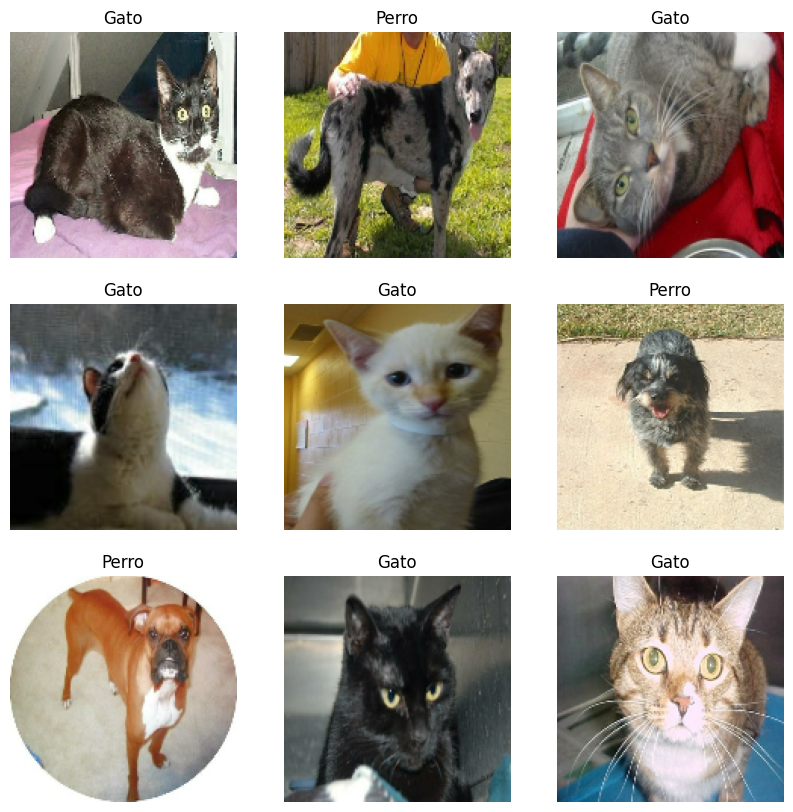

In [ ]:
#@title Chequeo de las imagenes

# Tomamos un lote del dataset
for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # Muestra la imagen, ya que está normalizada, la visualiza correctamente
    plt.imshow(images[i])

    # Obtiene la etiqueta del tensor y la convierte a un valor de Python
    label = labels[i].numpy()

    if label == 1:
      plt.title("Perro")
    else:
      plt.title("Gato")

    plt.axis("off")

## Creamos nuestra Red Neuronal Convolucional (CNN)

In [ ]:
#@title Instaciamos el modelo
model = Sequential()

In [ ]:
#@title Añadimos las capas convolucionales y de pooling

# Bloque 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Bloque 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Bloque 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# @title Añadimos las capas densas (Clasificadores)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# @title Resumen (Summary) del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

## Compilar y entrenar el modelo


In [ ]:
#@title Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title Entrenamos el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1127s 2s/step - accuracy: 0.5886 - loss: 0.6648 - val_accuracy: 0.7506 - val_loss: 0.5260
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1073s 2s/step - accuracy: 0.7554 - loss: 0.5015 - val_accuracy: 0.7842 - val_loss: 0.4455
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1072s 2s/step - accuracy: 0.8055 - loss: 0.4261 - val_accuracy: 0.8160 - val_loss: 0.4185
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1087s 2s/step - accuracy: 0.8481 - loss: 0.3452 - val_accuracy: 0.8106 - val_loss: 0.4759
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1068s 2s/step - accuracy: 0.8959 - loss: 0.2466 - val_accuracy: 0.7835 - val_loss: 0.5713
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1069s 2s/step - accuracy: 0.9442 - loss: 0.1521 - val_accuracy: 0.8136 - val_loss: 0.6236
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1156s 2s/step - accuracy: 0.9714 - loss: 0.0747 - val_accuracy: 0.8035 - val_loss: 0.8700
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1237s 2s/step - accuracy: 0.9810 - loss: 0.0529 - 

## Evaluamos Rendimientos y Visualizamos Resultados

In [ ]:
#Obtener los valores de precision y perdida del historial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

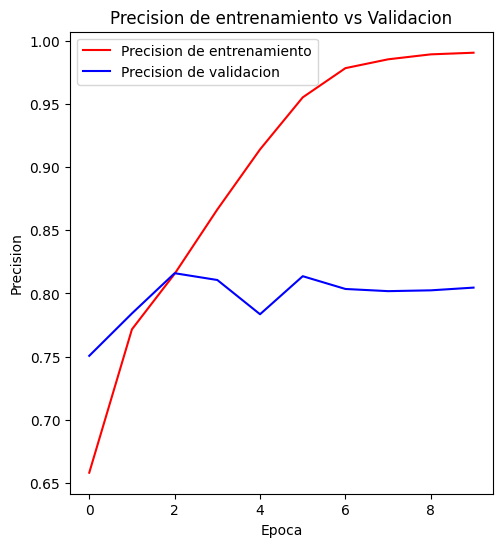

In [ ]:
#@title Graficamos la precision
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Precision de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precision de validacion')
plt.title('Precision de entrenamiento vs Validacion')
plt.xlabel('Epoca')
plt.ylabel('Precision')
plt.legend()

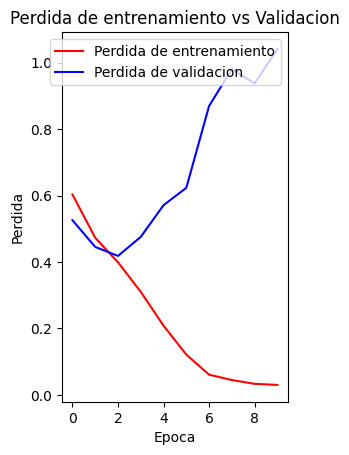

In [ ]:
#@title Graficamos la perdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Perdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Perdida de validacion')
plt.title('Perdida de entrenamiento vs Validacion')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.legend()

In [ ]:
#@title Evaluamos el modelo con datos de prueba
test_loss, test_acc = model.evaluate(ds_test)
print('Precision del modelo:', test_acc)

146/146 ━━━━━━━━━━━━━━━━━━━━ 73s 496ms/step - accuracy: 0.7942 - loss: 1.0768
Precision del modelo: 0.804600179195404


Obtenemos siempre una precision de entre 80 - 81%


## Evaluamos la eficacia de nuestra Red


146/146 ━━━━━━━━━━━━━━━━━━━━ 71s 487ms/step


Text(70.72222222222221, 0.5, 'Etiqueta Verdadera')

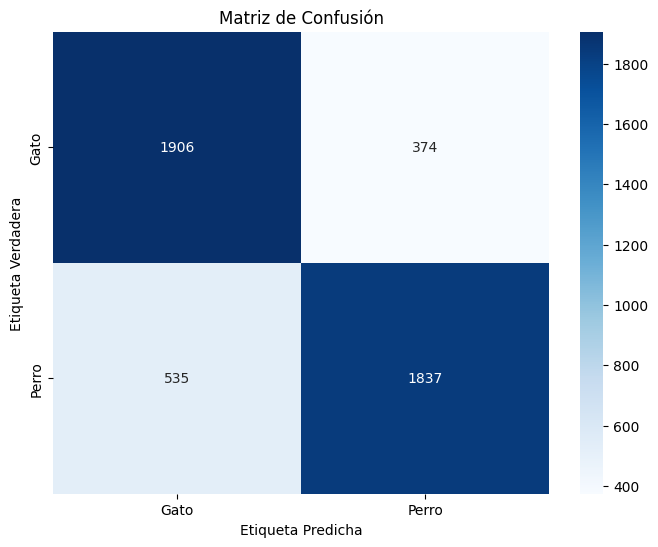

In [ ]:
#@title Matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las etiquetas verdaderas del conjunto de prueba
true_labels = []
for _, labels in ds_test:
    true_labels.extend(labels.numpy())

# Obtener las predicciones del modelo para el conjunto de prueba
predictions = model.predict(ds_test)

# Convertir las predicciones (probabilidades) a etiquetas binarias (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Generar la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gato', 'Perro'], yticklabels=['Gato', 'Perro'])
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

Podemos apreciar que predice efectivamente si es un gato o un perro alrededor del 80% de los casos. Lo cual es un buen resultado

In [ ]:
#@title Precisión, Exhaustividad y Puntuación F1
from sklearn.metrics import classification_report

# Asumiendo que ya tienes `true_labels` y `predicted_labels`
print(classification_report(true_labels, predicted_labels, target_names=['Gato', 'Perro']))

              precision    recall  f1-score   support

        Gato       0.78      0.84      0.81      2280
       Perro       0.83      0.77      0.80      2372

    accuracy                           0.80      4652
   macro avg       0.81      0.81      0.80      4652
weighted avg       0.81      0.80      0.80      4652



Con esto confirmamos que su precision, exhaustividad y Puntuacion son del 81% lo que confirma lo visto en nuestra matriz de confusion

146/146 ━━━━━━━━━━━━━━━━━━━━ 72s 493ms/step
AUC: 0.8900


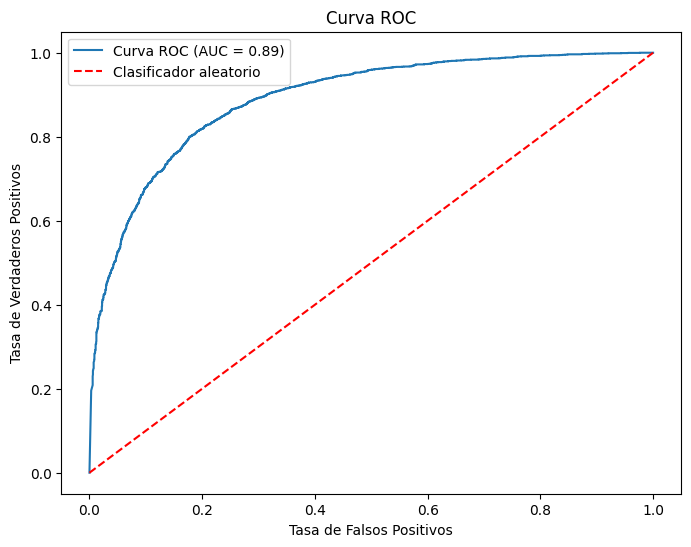

In [19]:
#@title Curva ROC (Receiver Operating Characteristic) y AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular el AUC
auc = roc_auc_score(true_labels, predictions)
print(f'AUC: {auc:.4f}')

# Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()

In [20]:
# Separar las predicciones en dos grupos:
# Probabilidades para los casos reales 'gato' (etiqueta 0)
cat_predictions = predictions[predictions <= 0.5]
# Probabilidades para los casos reales 'perro' (etiqueta 1)
dog_predictions = predictions[predictions > 0.5]

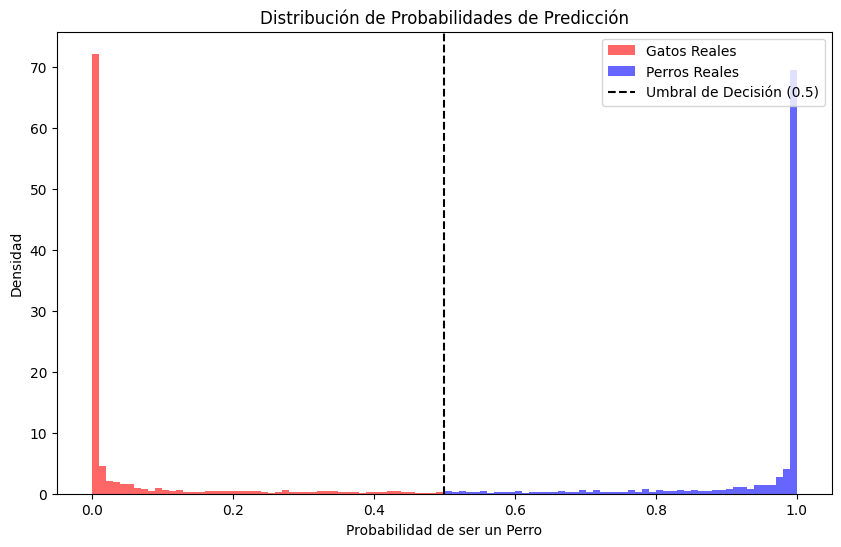

In [21]:
# Crear un histograma para visualizar la distribución de las predicciones
plt.figure(figsize=(10, 6))

# Histograma para los gatos reales
plt.hist(cat_predictions, bins=50, alpha=0.6, color='red', label='Gatos Reales', density=True)

# Histograma para los perros reales
plt.hist(dog_predictions, bins=50, alpha=0.6, color='blue', label='Perros Reales', density=True)

# Línea vertical para el umbral de decisión (0.5)
plt.axvline(x=0.5, color='black', linestyle='--', label='Umbral de Decisión (0.5)')

# Configuración del gráfico
plt.title('Distribución de Probabilidades de Predicción')
plt.xlabel('Probabilidad de ser un Perro')
plt.ylabel('Densidad')
plt.legend(loc='upper right')

In [22]:
#@title Guardamos nuestro modelo
model.save('clasificador_perros_gatos.h5')

model = tf.keras.models.load_model("clasificador_perros_gatos.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("catsdogs_cnn.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpnxf_wdwl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139965538146384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538147728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538147536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538147920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538147152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538148880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538146192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538149840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538149648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139965538149264: TensorSpec(shape=(), dtype=tf.resource, name=None)
